# Stack
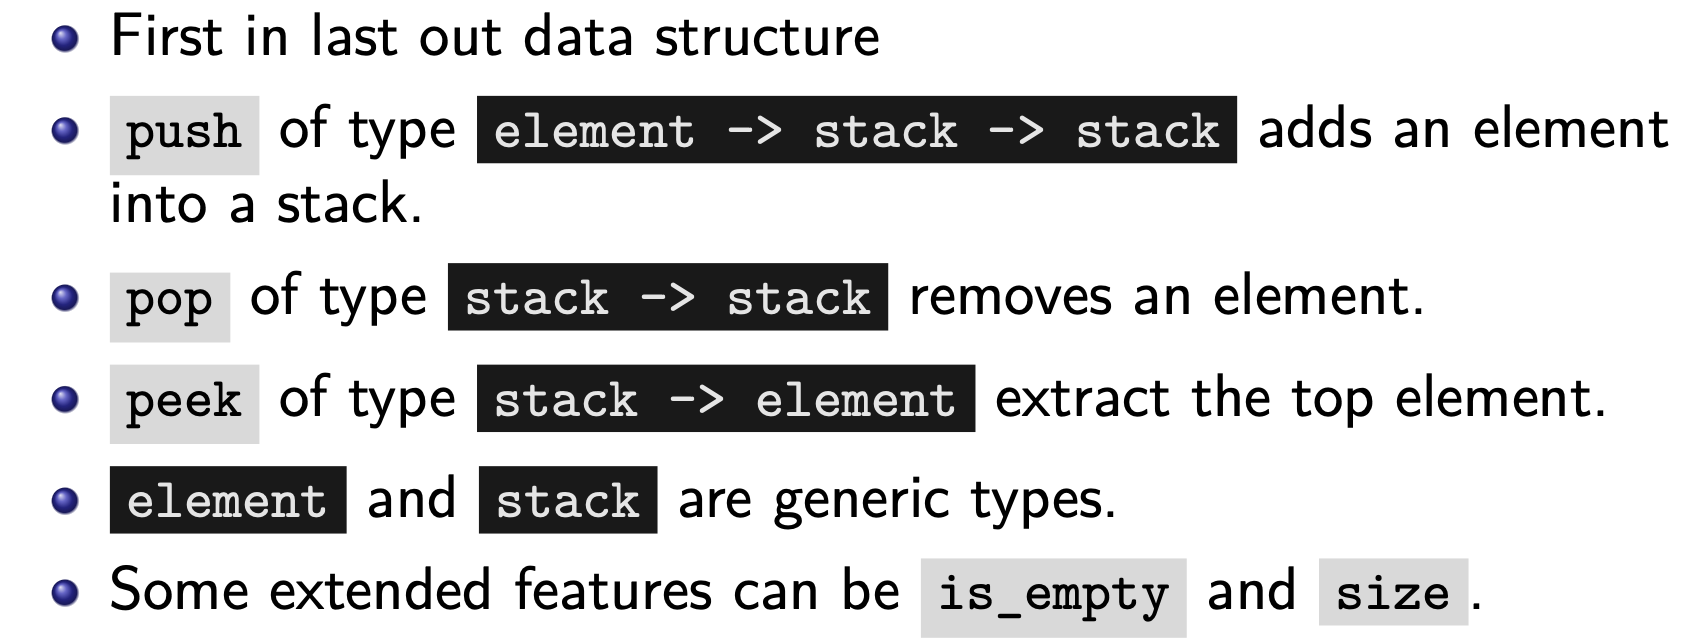

In [ ]:
module type Stack = sig
  type 'a element
  type 'a stack
  exception Empty
  val empty : 'a stack
  val push : 'a stack -> 'a element -> 'a stack
  val pop : 'a stack -> 'a stack
  val peek : 'a stack -> 'a element
end;;

# Queue
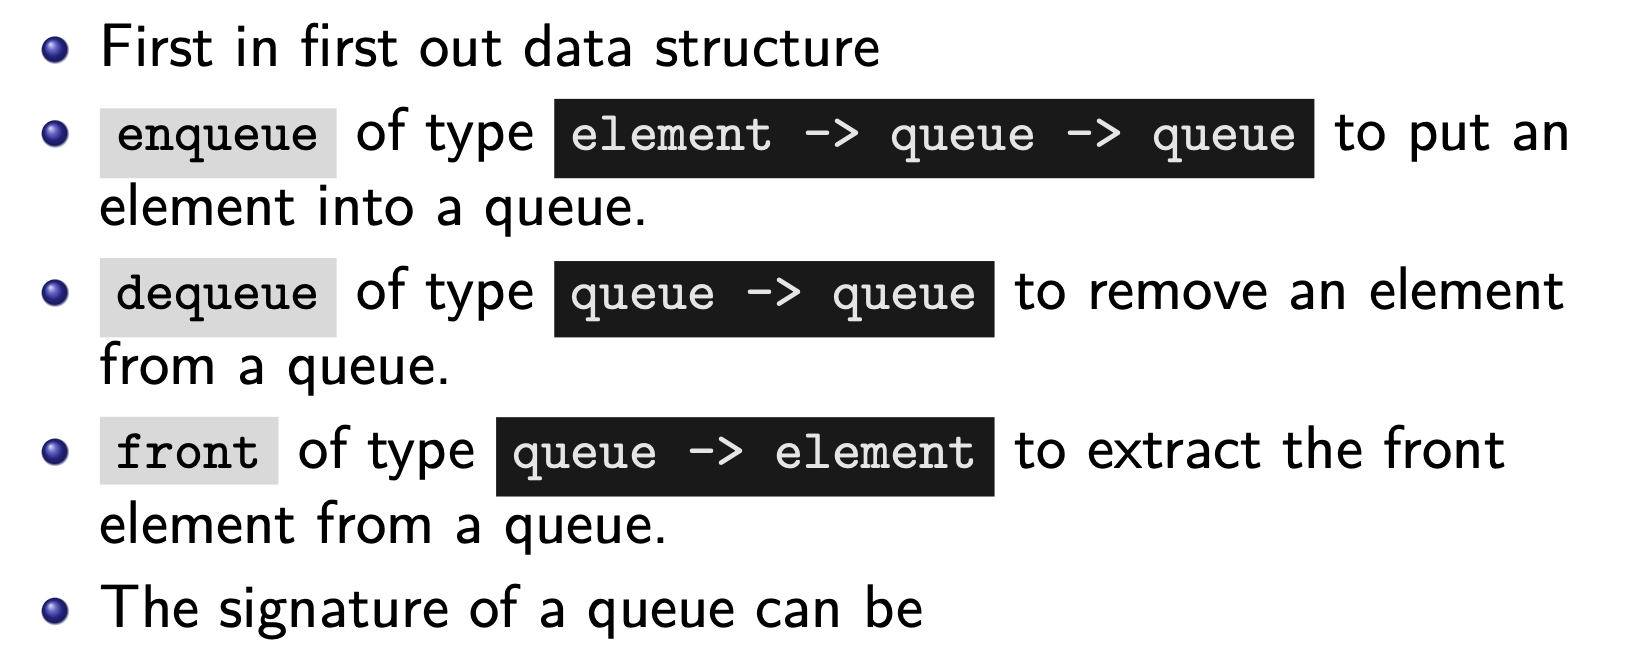

In [2]:
module type Queue = sig
  type 'a queue
  exception Empty
  val empty : 'a queue
  val enqueue : 'a -> 'a queue -> 'a queue
  val dequeue : 'a queue -> 'a queue
  val front : 'a queue -> 'a
  val size : 'a queue -> int
end;;

module type Queue =
  sig
    type 'a queue
    exception Empty
    val empty : 'a queue
    val enqueue : 'a -> 'a queue -> 'a queue
    val dequeue : 'a queue -> 'a queue
    val front : 'a queue -> 'a
    val size : 'a queue -> int
  end


In [5]:
module ListQueue : Queue with
  type 'a queue = 'a list = struct
  type 'a queue = 'a list
  exception Empty
  let empty = []
  let enqueue e q = q @ [e]
  let dequeue = function
  | [] -> raise Empty | h:: t -> t
  let front = function
  | [] -> raise Empty | h:: t -> h
  let rec size q = List.length q
end;; 

module ListQueue :
  sig
    type 'a queue = 'a list
    exception Empty
    val empty : 'a queue
    val enqueue : 'a -> 'a queue -> 'a queue
    val dequeue : 'a queue -> 'a queue
    val front : 'a queue -> 'a
    val size : 'a queue -> int
  end


# Set
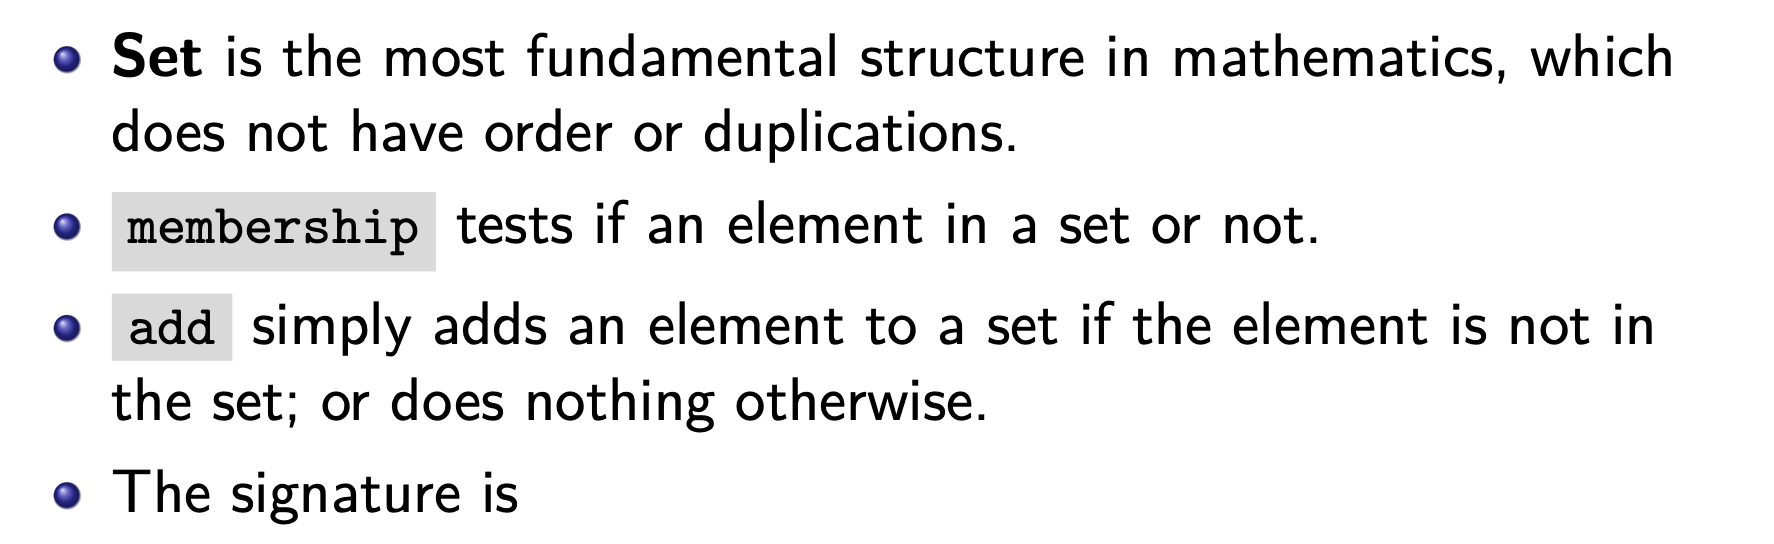

In [6]:
module type Set = sig
  type 'a set
  val empty : 'a set
  val membership : 'a -> 'a set -> bool
  val add: 'a -> 'a set -> 'a set
end;;

module type Set =
  sig
    type 'a set
    val empty : 'a set
    val membership : 'a -> 'a set -> bool
    val add : 'a -> 'a set -> 'a set
  end


In [7]:
module ListSet : Set with
  type 'a set = 'a list = struct
  type 'a set = 'a list
  let empty : 'a set = []
  let rec membership e = function
  | [] -> false
  | h :: t -> h = e || membership e t
  let rec add e = function
  | [] -> [e]
  | h :: t -> if h = e then h :: t else h :: add e t
end;;

module ListSet :
  sig
    type 'a set = 'a list
    val empty : 'a set
    val membership : 'a -> 'a set -> bool
    val add : 'a -> 'a set -> 'a set
  end


## Dictionary
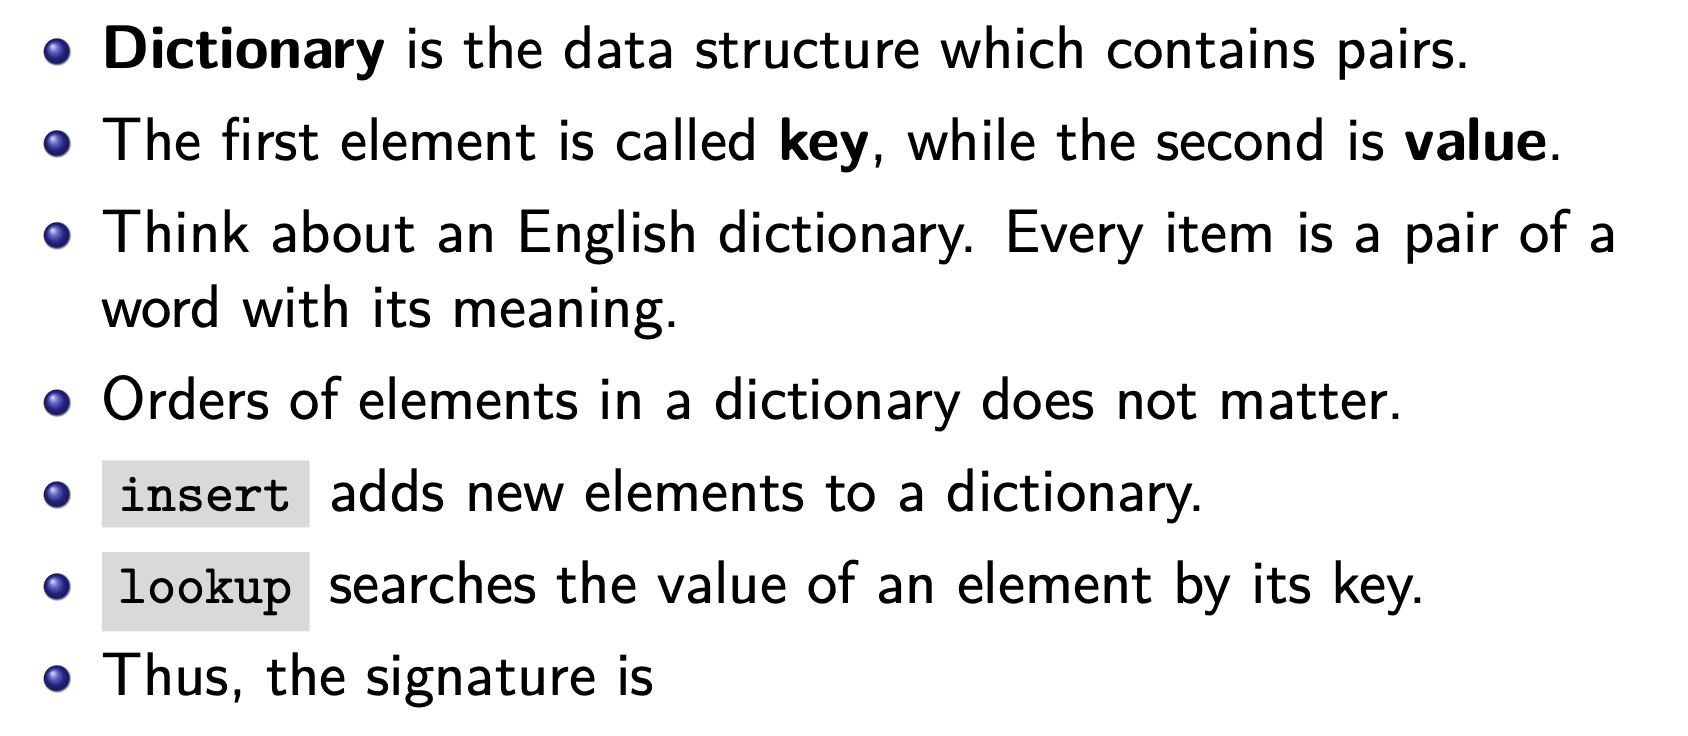

In [8]:
module type Dictionary = sig
  type ('k, 'v) d
  exception Not_Found
  val empty : ('k, 'v) d
  val insert : 'k-> 'v-> ('k, 'v)d-> ('k, 'v) d
  val lookup : 'k -> ('k, 'v)d -> ' v
end;;

module type Dictionary =
  sig
    type ('k, 'v) d
    exception Not_Found
    val empty : ('k, 'v) d
    val insert : 'k -> 'v -> ('k, 'v) d -> ('k, 'v) d
    val lookup : 'k -> ('k, 'v) d -> 'v
  end


In [24]:
module ListDictionary : Dictionary with
  type ('k, 'v)d = ('k * 'v) list = struct
  type ('k, 'v)d = ('k * 'v) list
  exception Not_Found
  let empty : ('k, 'v)d = []
  let rec lookup k = function
    | [] -> raise Not_Found
    | h:: t -> begin
      match h with
      | (a, b) -> if a=k then b else lookup k t
      end
  let insert k v d = 
    try (lookup k d ; d)
    with Not_Found -> (k, v) :: d
end;;

module ListDictionary :
  sig
    type ('k, 'v) d = ('k * 'v) list
    exception Not_Found
    val empty : ('k, 'v) d
    val insert : 'k -> 'v -> ('k, 'v) d -> ('k, 'v) d
    val lookup : 'k -> ('k, 'v) d -> 'v
  end


## Tree
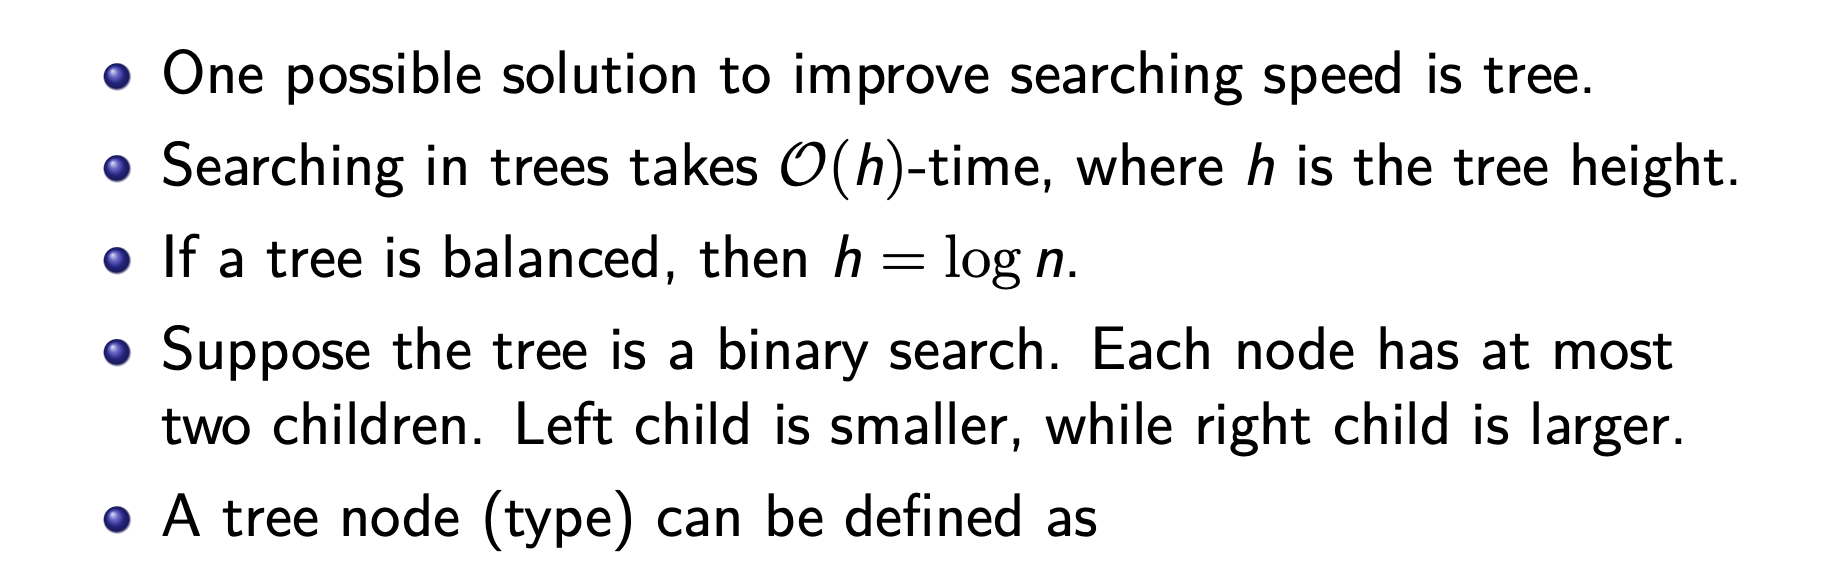

In [37]:
type 'a tree =
| Node of 'a *'a tree * 'a tree
| Leaf;;

let rec mem e = function
| Leaf -> false
| Node (v, l, r) ->
  if e = v then true
  else if e<v then mem e l
  else mem e r;;

let rec insert e = function
| Leaf -> Node (e, Leaf, Leaf)
| Node (v, l, r) ->
  if e = v then Node(v, l, r)
  else if e < v then Node (v, insert e l, r)
  else Node (v, l, insert e r);;

let t1 = insert 2 ( insert 1 ( insert 0 Leaf ));;
let t2 = Leaf |> insert 0|> insert 1|> insert 2;;
let t3 = insert 0 Leaf 

type 'a tree = Node of 'a * 'a tree * 'a tree | Leaf


val mem : 'a -> 'a tree -> bool = <fun>


val insert : 'a -> 'a tree -> 'a tree = <fun>


val t1 : int tree = Node (0, Leaf, Node (1, Leaf, Node (2, Leaf, Leaf)))


val t2 : int tree = Node (0, Leaf, Node (1, Leaf, Node (2, Leaf, Leaf)))


val t3 : int tree = Node (0, Leaf, Leaf)


## Red-Black Tree
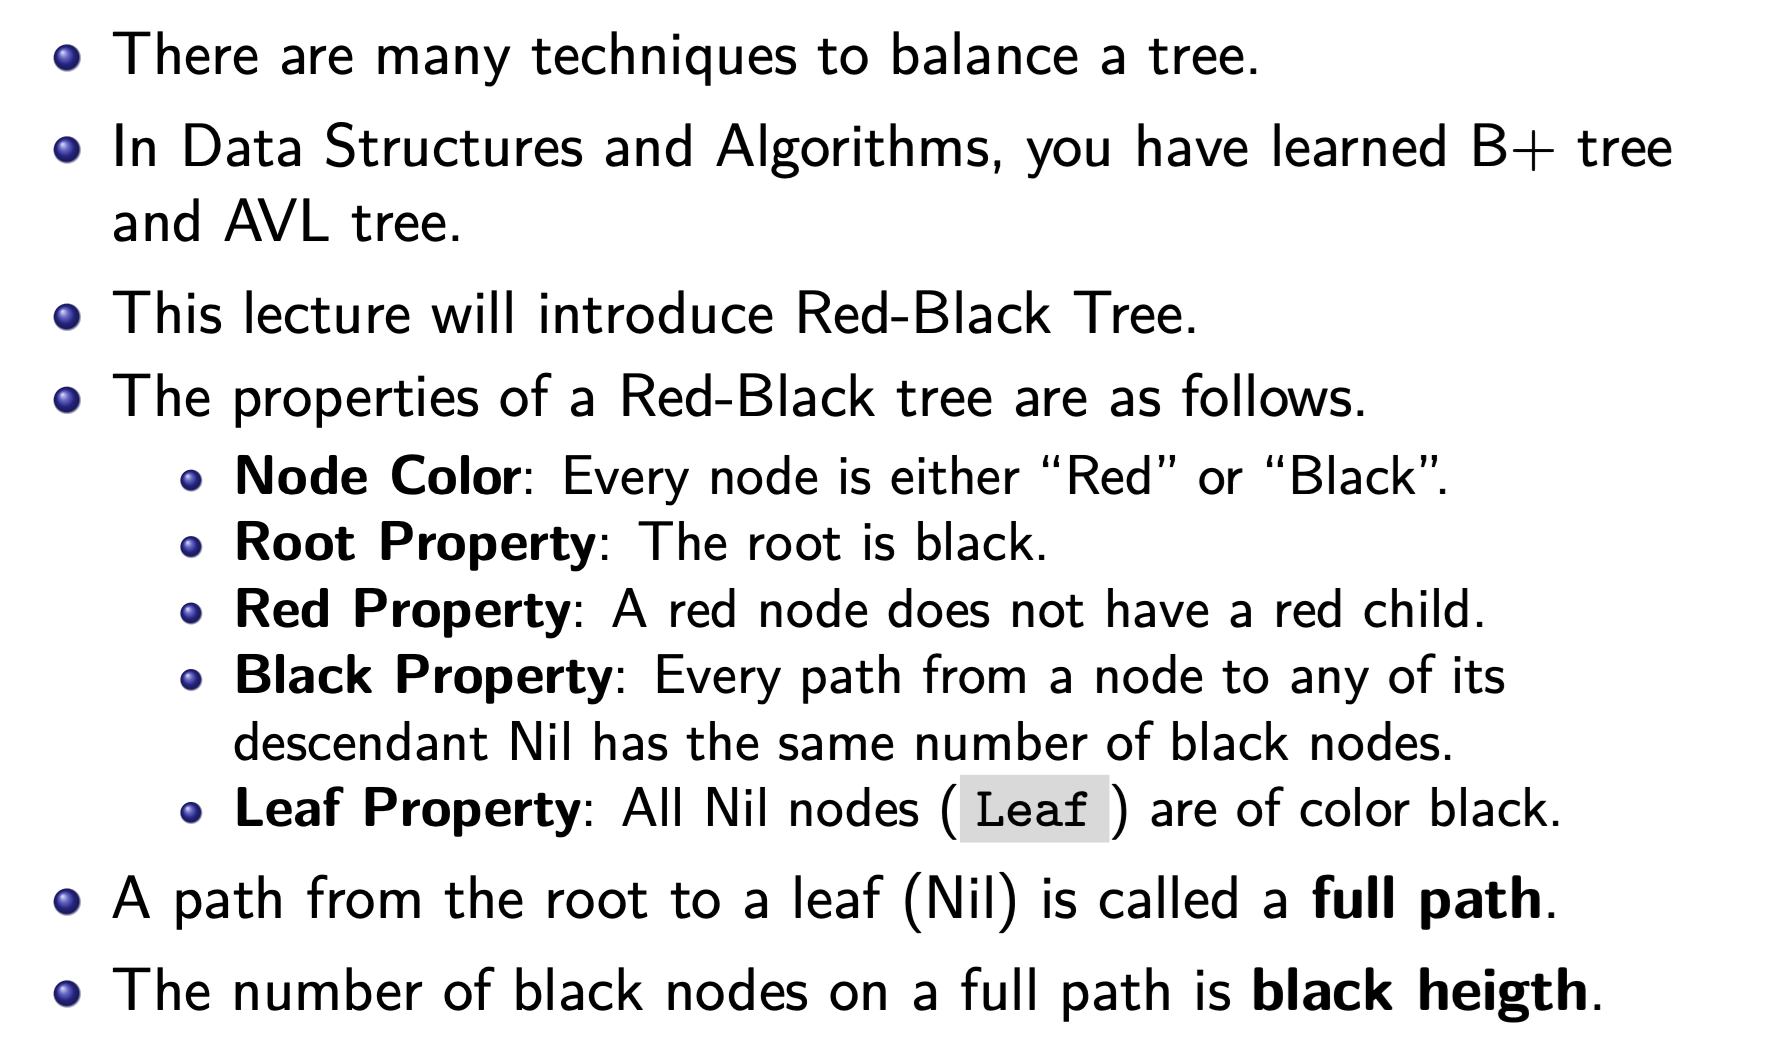

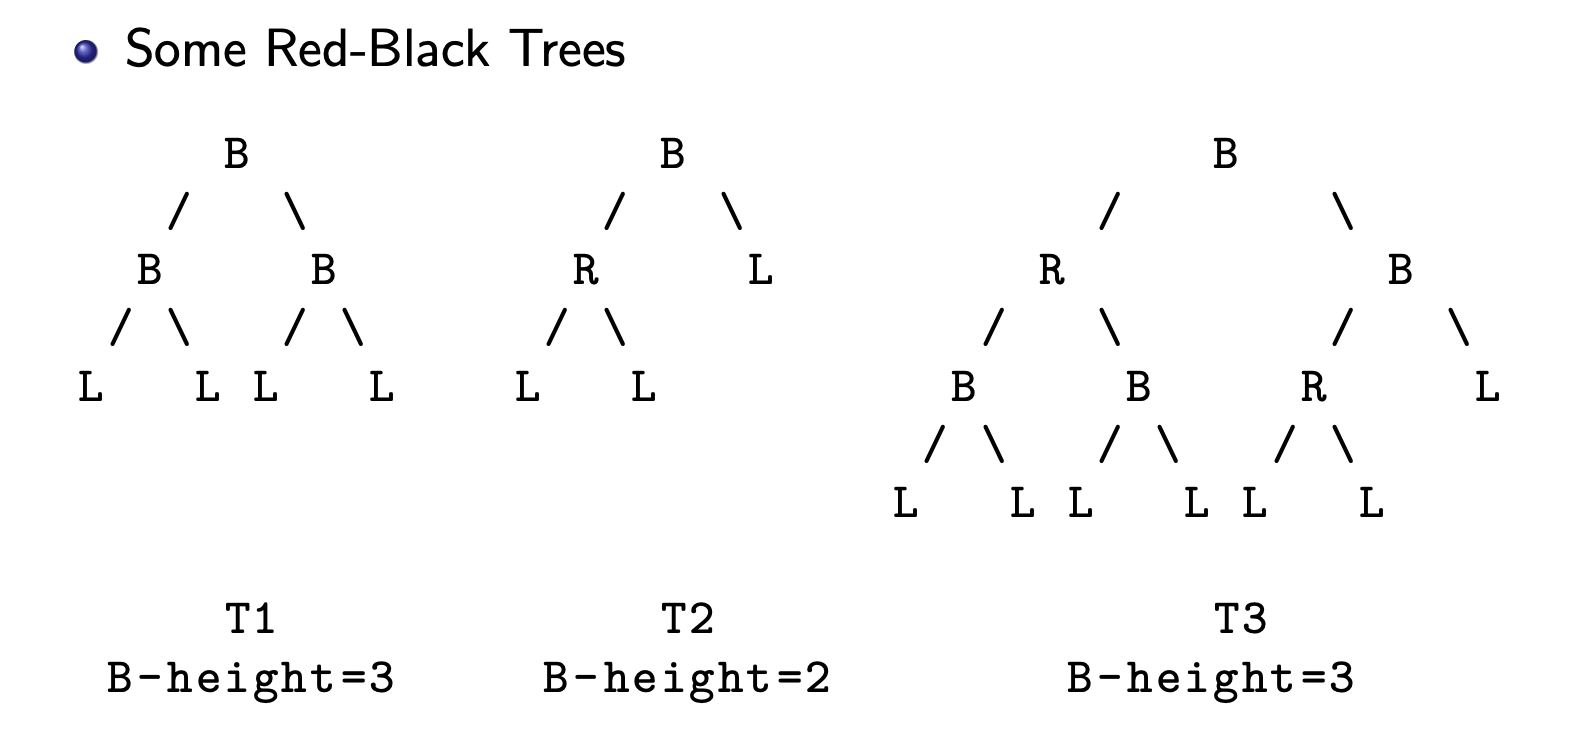

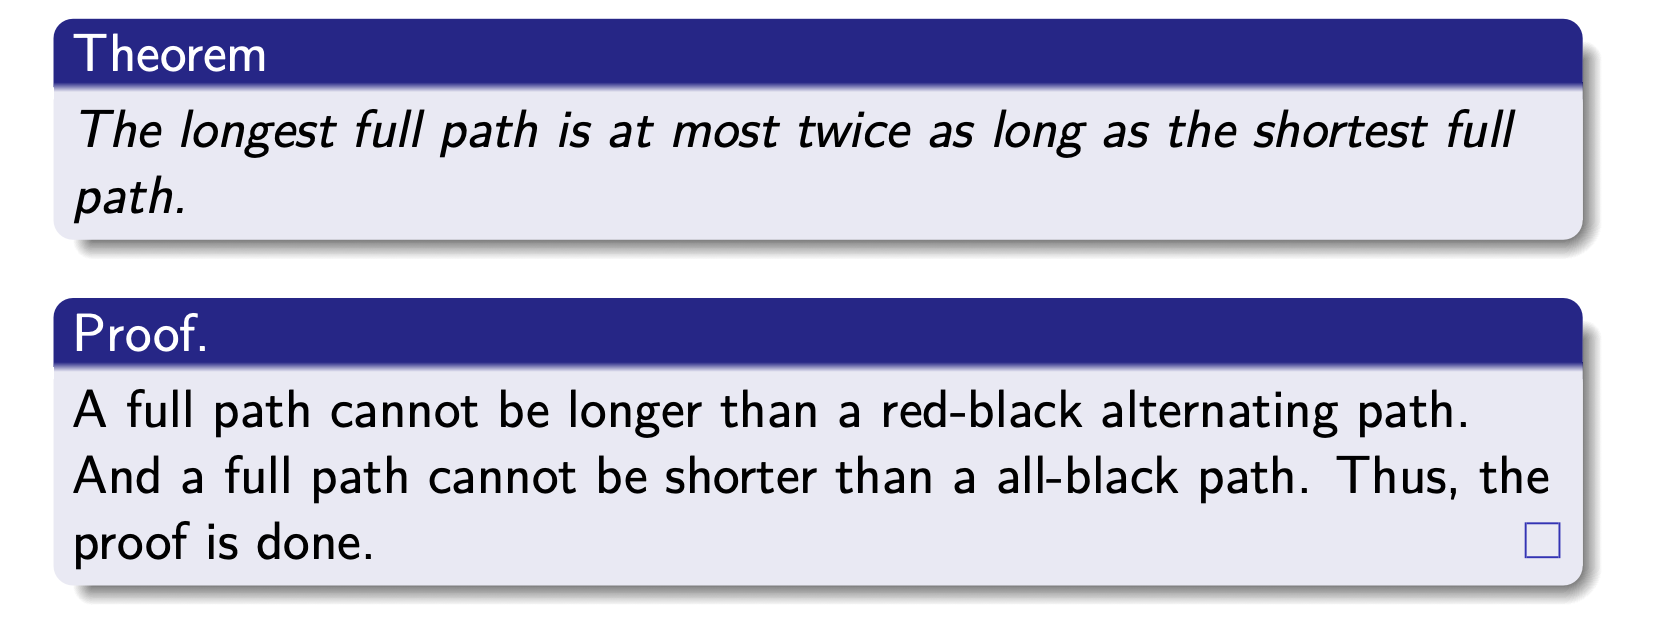

In [40]:
type color = Red | Black;;
type 'a rbtree =
  | Leaf
  | Node of color *'a *'a rbtree *'a rbtree;;

  let rec rbmem e = function
    | Leaf -> false
    | Node (_, v, l, r) ->
    if e = v then true
    else if e < v then rbmem e l
    else rbmem e r;;

type color = Red | Black


type 'a rbtree = Leaf | Node of color * 'a * 'a rbtree * 'a rbtree


val rbmem : 'a -> 'a rbtree -> bool = <fun>


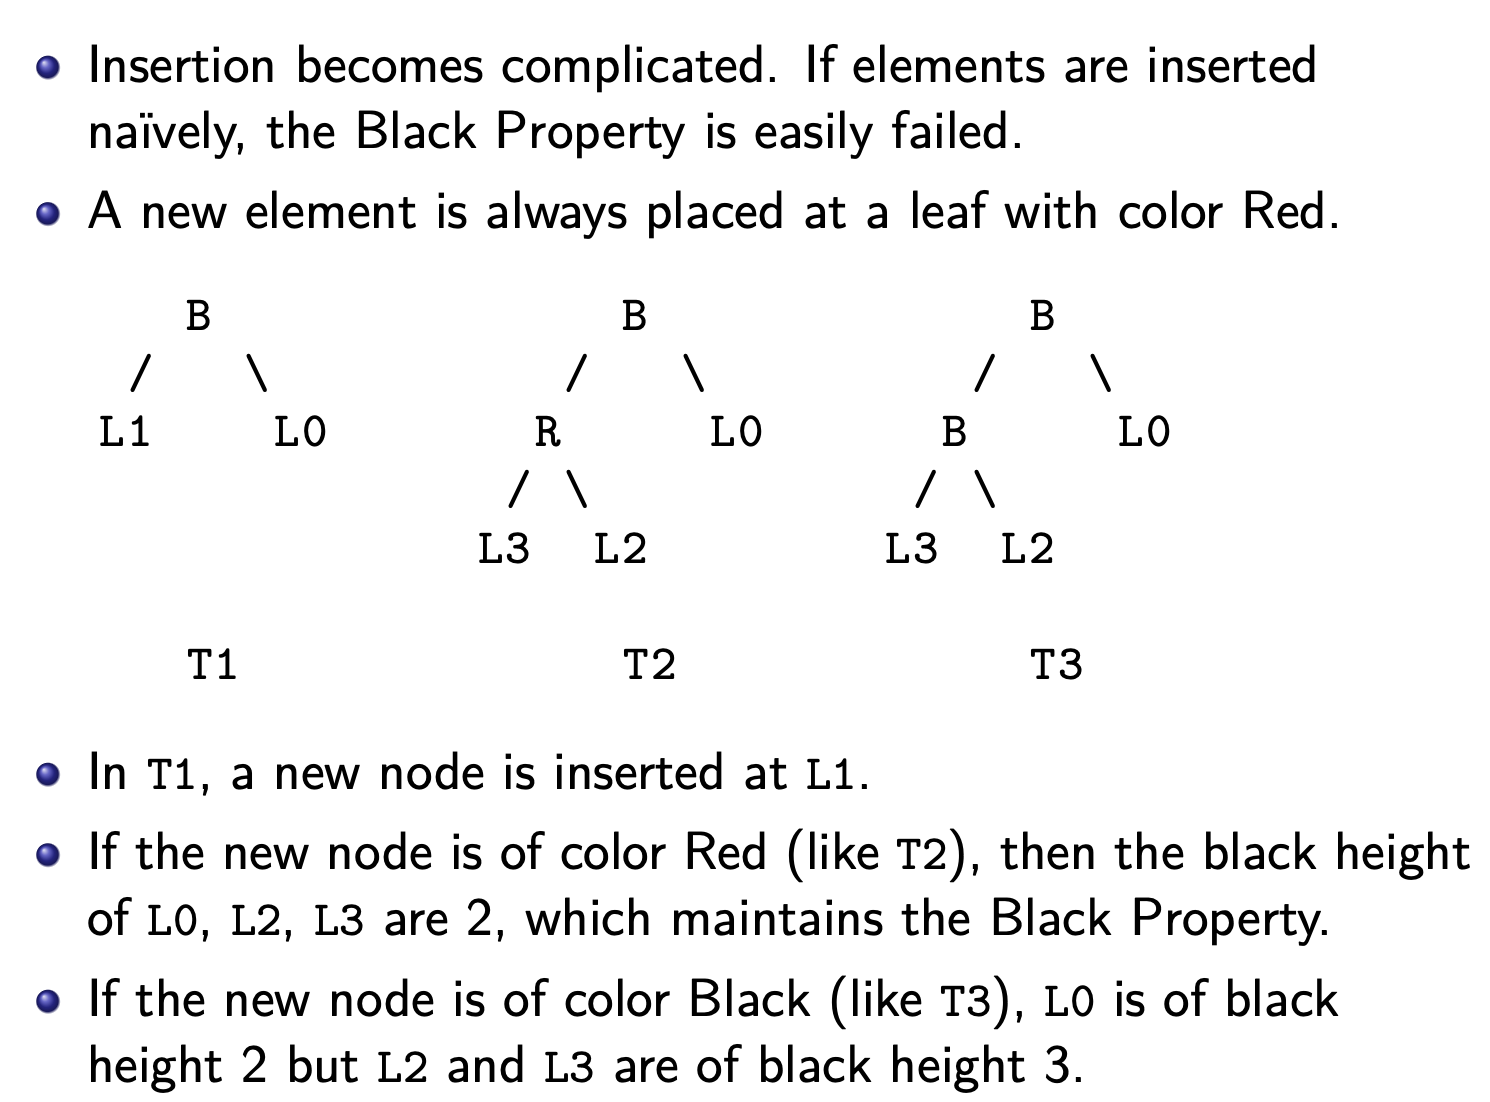

In [ ]:
let rebalance = function
  | Node(Black,n0,Node(Red,n1,Node(Red,n2,a,b),c),d) -> Node(Red,n1,Node(Black,n2,a,b),Node(Black,n0,c,d))
  | Node(Black,n0,Node(Red,n1,a,Node(Red,n2,b,c)),d) -> Node(Red,n2,Node(Black,n1,a,b),Node(Black,n0,c,d))
  | Node(Black,n0,a,Node(Red,n1,b,Node(Red,n2,c,d))) -> Node(Red,n1,Node(Black,n0,a,b),Node(Black,n2,c,d))
  | Node(Black,n0,a,Node(Red,n1,Node(Red,n2,b,c),d)) -> Node(Red,n2,Node(Black,n0,a,b),Node(Black,n1,c,d))
  | x -> x;



val rebalance : 'a rbtree -> 'a rbtree = <fun>


In [47]:
let rebalance = function
  | Black, n2, Node(Red, n1, Node(Red, n0, a, b), c), d | Black, n2, Node(Red, n0, a, Node(Red, n1, b, c)), d 
  | Black, n0, a, Node(Red, n1, b, Node(Red, n2, c, d)) | Black, n0, a, Node(Red, n2, Node(Red, n1, b, c), d)
  -> Node(Red, n1, Node(Black, n0, a, b), Node(Black, n2, c, d))
  | c, n, l, r -> Node(c, n, l, r);;

val rebalance : color * 'a * 'a rbtree * 'a rbtree -> 'a rbtree = <fun>


In [50]:
let rec ins_helper e = function
  | Leaf -> Node(Red, e, Leaf, Leaf)
  | Node (c, v, l, r) ->
    if e < v then
      rebalance (c, v, ins_helper e l, r)
    else if e > v then
      rebalance (c, v, l, ins_helper e r)
    else Node(c, v, l, r);;

exception Insertion_Failure;;

let insert n e =
  match ins_helper e n with
  | Node (_, v, l, r) -> Node (Black, v, l, r)
  | _ -> raise Insertion_Failure;;

val ins_helper : 'a -> 'a rbtree -> 'a rbtree = <fun>


exception Insertion_Failure


val insert : 'a rbtree -> 'a -> 'a rbtree = <fun>
